In [1]:
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
import matplotlib.pyplot as plt
import numpy as np
from tensorflow import math
import seaborn as sns
import cv2


In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [3]:
len(x_train)

60000

In [4]:
len(x_test)

10000

In [5]:
x_train.shape

(60000, 28, 28)

In [6]:
x_train[1].shape

(28, 28)

In [7]:
x_train[1]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,  51, 159, 253, 159,  50,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,  48, 238, 252, 252, 252, 237,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

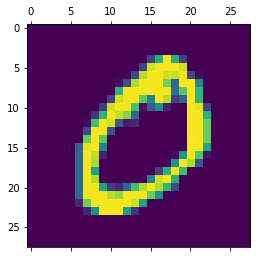

In [8]:
plt.matshow(x_train[1])

In [9]:
y_train[1]

0

In [10]:
# Normalize
x_train = x_train / 255
x_test = x_test / 255

In [11]:
x_train[1]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [12]:
IMG_SIZE = 28

In [13]:
x_train_flat = x_train.reshape(len(x_train), IMG_SIZE * IMG_SIZE)

In [14]:
x_train_flat.shape

(60000, 784)

In [15]:
x_test_flat = x_test.reshape(len(x_test), IMG_SIZE * IMG_SIZE)

In [16]:
x_test_flat.shape

(10000, 784)

In [17]:
# x_train_flat[1]

In [18]:
# x_train_flat[0].shape

In [19]:
#  ANN

model = Sequential([
     Dense(100, input_shape =(784,),activation = 'relu'),
#    Dense(10, input_shape =(784,),activation = 'softmax'),
#     Dense(200, activation = 'relu'),
#     Dense(100, activation = 'relu'),
#     Dense(50,  activation = 'relu'),
     Dense(10, activation = 'softmax')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics= ['accuracy']
)

model.fit(x_train_flat, y_train, epochs=5)



Epoch 1/5
1875/1875 [==============================] - 69s 2ms/step - loss: 0.4405 - accuracy: 0.8781
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1311 - accuracy: 0.9616
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0844 - accuracy: 0.9750
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0671 - accuracy: 0.9800
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0487 - accuracy: 0.9854


In [20]:
model.evaluate(x_test_flat, y_test)

313/313 [==============================] - 1s 840us/step - loss: 0.0782 - accuracy: 0.9765


[0.07821066677570343, 0.9764999747276306]

In [21]:
# model.summary()

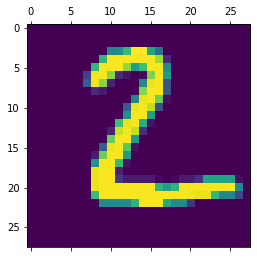

In [22]:
plt.matshow(x_test[1])

In [23]:
y_test[1]

2

In [24]:
y_pred = model.predict(x_test_flat)


In [25]:
y_pred[1]

array([1.4327603e-06, 1.1992808e-05, 9.9981409e-01, 1.5474025e-04,
       4.1681675e-14, 1.5259866e-05, 2.3455052e-06, 1.6363507e-12,
       1.4796069e-07, 2.4613261e-12], dtype=float32)

In [26]:
np.argmax(y_pred[1])

2

In [27]:
y_pred.shape


(10000, 10)

In [28]:
y_label = [np.argmax(i) for i in y_pred]
y_label[1]

2

In [29]:
confusion_matrix = math.confusion_matrix(labels = y_test, predictions = y_label)
confusion_matrix

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    0,    3,    0,    1,    3,    4,    1,    0],
       [   0, 1124,    3,    2,    0,    1,    2,    1,    2,    0],
       [   4,    0, 1005,    2,    1,    0,    4,    7,    9,    0],
       [   0,    0,    1,  998,    0,    1,    0,    4,    3,    3],
       [   0,    0,    2,    1,  961,    1,    5,    2,    0,   10],
       [   2,    0,    0,   16,    1,  865,    2,    3,    2,    1],
       [   6,    3,    0,    0,    4,    6,  938,    0,    1,    0],
       [   1,    5,    8,    4,    1,    0,    0,  998,    2,    9],
       [   5,    0,    6,   13,    5,    7,    3,    4,  927,    4],
       [   1,    3,    0,    5,   10,    2,    0,    6,    1,  981]])>

Text(87.0, 0.5, 'y_test')

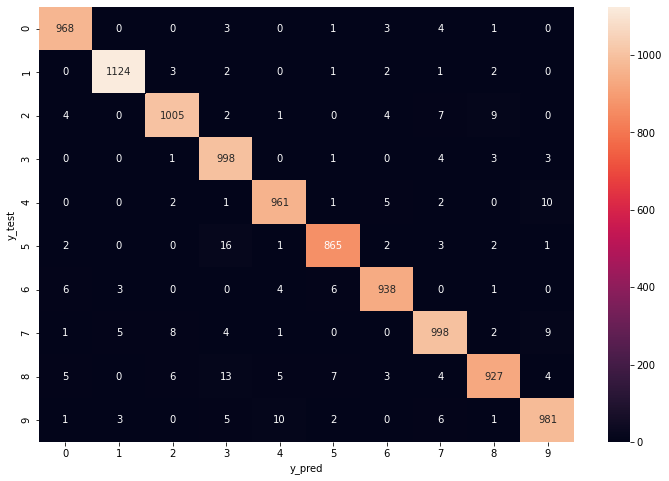

In [30]:
plt.figure(figsize = (12,8 ))
sns.heatmap(confusion_matrix, annot=True, fmt= 'd')
plt.xlabel('y_pred')
plt.ylabel('y_test')

(287, 445, 3)

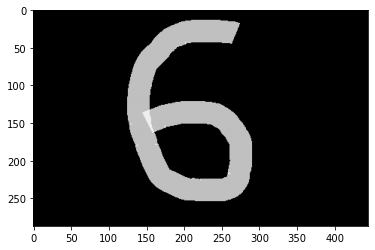

In [31]:
img_hand_written = cv2.imread('6.png')
plt.imshow(img_hand_written)
img_hand_written.shape

(287, 445)

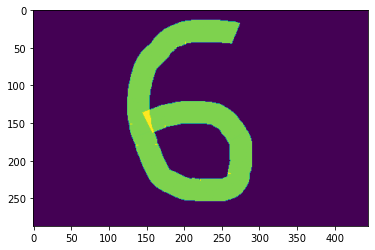

In [32]:
img_gray = cv2.cvtColor(img_hand_written,cv2.COLOR_BGR2GRAY)
plt.imshow(img_gray)
img_gray.shape

(28, 28)

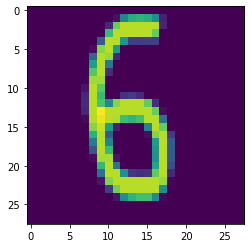

In [33]:
img_resized=cv2.resize(img_gray,(28,28), interpolation = cv2.INTER_AREA)
plt.imshow(img_resized)
img_resized.shape

In [34]:
img_resized

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  10,  96,
        136, 140, 134, 107,  20,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  24, 167, 192,
        192, 192, 192, 192,  22,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145, 192, 192,
        192, 192, 192, 163,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,  61, 192, 192, 112,
         41,  37,  41,  40,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   8, 176, 192, 119,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [35]:
# Normalize
img_new = img_resized/255
img_new

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.03921569, 0.37647059, 0.53333333, 0.54901961,
        0.5254902 , 0.41960784, 0.07843137, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.09411765, 0.65490196, 0.75294118, 0.75294118, 0.75294118,
        0.75294118, 0.7529

In [36]:
# flatten
img_new = np.array(img_new).reshape(-1, IMG_SIZE * IMG_SIZE)
img_new.shape

(1, 784)

In [37]:
prediction = model.predict(img_new)
print(np.argmax(prediction))

6


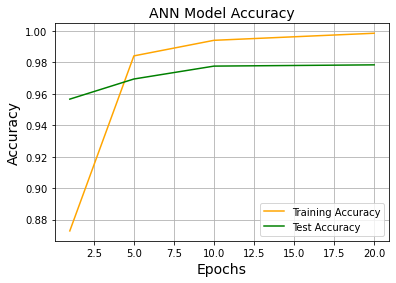

In [38]:
import matplotlib.pyplot as plt
Epochs = [1, 5, 10, 20]
Training_Accuracy = [0.8728, 0.9841, 0.9940, 0.9985]
Test_Accuracy = [0.9566, 0.9694, 0.9776, 0.9784]
Training_loss = [0.4564, 0.0501, 0.0187, 0.0049]
Test_loss = [0.1474, 0.0966, 0.0777, 0.1008]

plt.plot(Epochs, Training_Accuracy, color = 'orange' , label = 'Training Accuracy' )
plt.plot(Epochs, Test_Accuracy, color = 'green', label = 'Test Accuracy')
plt. title('ANN Model Accuracy' , fontsize = 14)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('Accuracy', fontsize = 14)
plt.grid(True)
plt.legend()
plt.show()

 

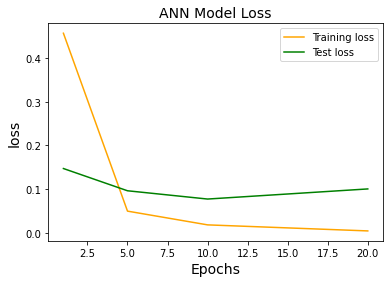

In [39]:
plt.plot(Epochs, Training_loss, color = 'orange' , label = 'Training loss' )
plt.plot(Epochs, Test_loss, color = 'green' , label = 'Test loss' )
plt. title('ANN Model Loss' , fontsize = 14)
plt.xlabel('Epochs', fontsize = 14)
plt.ylabel('loss', fontsize = 14)
plt.legend()
